## Oppgave 1

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
# Stiller inn ønsket parameter for figurer
fontsize = 12
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 1.5, 'lines.markersize': 12,
             'figure.figsize': (10, 4), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5, 'figure.autolayout': True}

hBar = 1.0545718e-34 # Planck const
m = 9.10938e-31 # mass of electron
V0 = -1.5e-16
w = 50e-12 # 65 picometers, width of well

In [55]:
'''
Denne funksjonen tar inn oppgavenummer, og antall elementer i bølgefunksjonen,
og returnerer Energiegenverdiene, og de normaliserte bølgefunksjonene, x-verdiene, og lengden på x-aksen
'''
def eigenvalue_eigenvector(exercise, N = 1000):
    if exercise == 1:
        x, DeltaX, L, d, e = exer_1(N)
    elif exercise == 2:
        x, DeltaX, L, d, e = exer_2(N)
    elif exercise == 3:
        x, DeltaX, L, d, e = exer_3(N)
    elif exercise == 4:
        x, DeltaX, L, d, e = exer_4(N)
    # Bruker scipy sin eigh_tridiagonal for å hente ut egenverdiene E, og egenvektorene psi
    E, psi = eigh_tridiagonal(d, e)
    # Normerer psi
    normalize_vectors(N, psi, DeltaX)
    return E, psi, x, L

In [56]:
def exer_1(N):
    L = 50e-12 # 50 picometers
    DeltaX = L/(N+1) # Delta x
    x = np.linspace(0, L, N+2)
    c = -hBar**2/(2*m * DeltaX**2)
    d = -2*c * np.ones(N) # the diagonal elements of the array
    e = c * np.ones(N-1) # the off-diagonal elements of the array
    return x[1:-1], DeltaX, L, d, e

In [57]:
# Denne funksjonen normerer bølgefunksjonen slik at integralet fra 0 til L av |psi(x)|^2 blir 1
def normalize_vectors(N, psi, DeltaX):
    for i in range(N):
        psi[:,i] = psi[:,i] / np.sqrt(DeltaX * np.sum(psi[:,i]**2))
        if psi[0,i] < 0:
            psi[:,i] *= -1 # Sørger for at psi alltid starter med positivt stigningstall

In [58]:
def analytic(x, L):
    N = x.size
    E_analytic = np.zeros(N)
    psi_analytic = np.zeros((N, N))
    for i in range(N):
        k_i = (i+1) * np.pi/L
        E_analytic[i] = hBar**2 * k_i**2 / (2*m)
        psi_analytic[:,i] = np.sqrt(2/L) * np.sin((i+1)*np.pi * x / L)
    return E_analytic, psi_analytic

In [59]:
def plot1():
    plt.rcParams.update(newparams)
    plt.subplot(1, 2, 1)
    plt.title(r"Numeriske løsninger på $\psi_\mathrm{i}(x)$, i = 1, 2, 3")
    plt.plot(x, psi[:, 0], label="$\psi_1(x)$")
    plt.plot(x, psi[:, 1], label="$\psi_2(x)$")
    plt.plot(x, psi[:, 2], label="$\psi_3(x)$")
    plt.axhline(0, linewidth=0.5, color='black')
    plt.xticks([0, L],
              ['0', r'$x = L$'])
    plt.yticks([-np.sqrt(2/L), 0, np.sqrt(2/L)],
              [r'$-\sqrt{2/L}$', r'0', r'$\sqrt{2/L}$'])
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.title(r"Analytiske løsninger på $\psi_\mathrm{i}(x)$, i = 1, 2, 3")
    plt.plot(x, psi[:, 0], label="$\psi_1(x)$")
    plt.plot(x, psi[:, 1], label="$\psi_2(x)$")
    plt.plot(x, psi[:, 2], label="$\psi_3(x)$")
    plt.axhline(0, linewidth=0.5, color='black')
    plt.xticks([0, L],
              ['0', r'$x = L$'])
    plt.yticks([-np.sqrt(2/L), 0, np.sqrt(2/L)],
              [r'$-\sqrt{2/L}$', r'0', r'$\sqrt{2/L}$'])
    plt.legend(loc='best')
    
    plt.show()

In [60]:
def plot2():
    width = 10
    height = 4
    plt.figure(figsize=(width, height))
    n = 1 + np.arange(10)
    plt.plot(n, E_a[:n.size], 'r.', label='Analytisk')
    plt.plot(n, E[:n.size], 'b+', label='Numerisk')
    plt.legend(loc='best')
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    plt.xlabel('Kvantetall n')
    plt.ylabel(r'Energiegenverdi $E_\mathrm{n}$ [ J ]')
    plt.show()

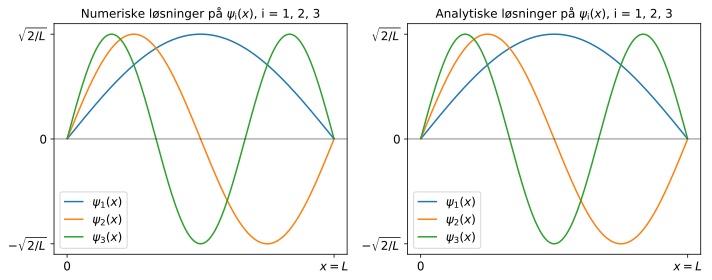

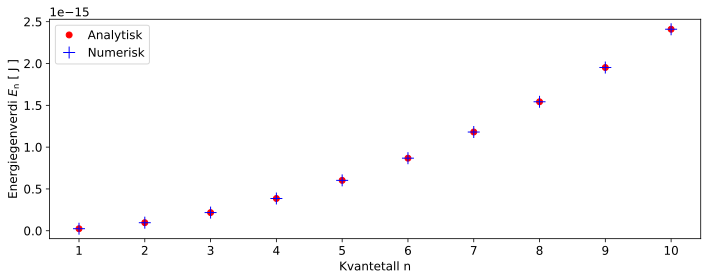

In [61]:
E, psi, x, L = eigenvalue_eigenvector(1) # Numerical solutions

E_a, psi_a = analytic(x, L) # Analytic solutions

plot1()
plot2()

In [62]:
def orthonormal_check():
    N = x.size
    ort_mat = np.zeros((N, N))
    DeltaX = L/(N+1)
    for i in range(N):
        ort_mat[i,i] = DeltaX*np.sum(psi[:,i]*psi[:,i])
        for j in range(i+1, N):
            elem = DeltaX*np.sum(psi[:,i]*psi[:,j])
            ort_mat[i,j], ort_mat[j,i] = elem, elem
    np.set_printoptions(precision=3)
    print("Sjekker at egenfunksjonene er ortonormale:\n", ort_mat, '\n')

def complete_set_check():
    N = x.size
    com_mat = np.zeros((N, N))
    DeltaX = L/(N+1)
    for i in range(N):
        com_mat[i,i] = DeltaX*np.sum(psi[i,:]*psi[i,:])
        for j in range(i+1, N):
            elem = DeltaX*np.sum(psi[i,:]*psi[j,:])
            com_mat[i,j], com_mat[j,i] = elem, elem
    np.set_printoptions(precision=3)
    print("Sjekker at egenfunksjonene danner et fullstendig sett:\n", com_mat, '\n')

orthonormal_check()
complete_set_check()

Sjekker at egenfunksjonene er ortonormale:
 [[ 1.000e+00 -1.805e-15 -1.512e-15 ... -9.908e-18  1.562e-17 -1.524e-17]
 [-1.805e-15  1.000e+00  1.512e-15 ... -1.524e-18  4.573e-18  2.248e-17]
 [-1.512e-15  1.512e-15  1.000e+00 ...  1.372e-17 -1.067e-17 -2.820e-17]
 ...
 [-9.908e-18 -1.524e-18  1.372e-17 ...  1.000e+00  1.073e-15 -2.195e-16]
 [ 1.562e-17  4.573e-18 -1.067e-17 ...  1.073e-15  1.000e+00 -1.854e-15]
 [-1.524e-17  2.248e-17 -2.820e-17 ... -2.195e-16 -1.854e-15  1.000e+00]] 

Sjekker at egenfunksjonene danner et fullstendig sett:
 [[ 1.000e+00 -2.293e-15  9.756e-17 ...  2.835e-16  3.582e-16  2.045e-16]
 [-2.293e-15  1.000e+00  1.902e-15 ...  3.300e-16  2.790e-16  3.201e-17]
 [ 9.756e-17  1.902e-15  1.000e+00 ...  4.398e-16 -3.887e-17  2.165e-16]
 ...
 [ 2.835e-16  3.300e-16  4.398e-16 ...  1.000e+00  1.268e-15 -4.634e-16]
 [ 3.582e-16  2.790e-16 -3.887e-17 ...  1.268e-15  1.000e+00 -1.902e-15]
 [ 2.045e-16  3.201e-17  2.165e-16 ... -4.634e-16 -1.902e-15  1.000e+00]] 




## Oppgave 2

In [63]:
def exer_2(N):
    L = w + 2*10*w
    DeltaX = L/(N+1) # Delta x
    x = np.linspace(0, L, N+2)
    c = -hBar**2/(2*m * DeltaX**2)
    d = -2*c * np.ones(N) # the diagonal elements of the array
    e = c * np.ones(N-1) # the off-diagonal elements of the array
    d[int(np.rint(N/L * (L - w)/2)) : int(np.rint(N/L * (L + w)/2))] += V0
    return x[1:-1], DeltaX, L, d, e

In [67]:
def plot3():
    width = 10
    height = 5
    plt.figure(figsize=(width, height))
    N = x.size
    sl = 350 # slice
    plt.title(r"3 bundne tilstander i en endelig brønn")
    plt.plot((L*sl/N, (L - w)/2), (0,0), 'k-')
    plt.plot(((L + w)/2, L*(1 - sl/N)), (0,0), 'k-')
    plt.plot(((L - w)/2, (L + w)/2), (V0,V0), 'k-')
    plt.plot(((L - w)/2, (L - w)/2), (V0,0), 'k-')
    plt.plot(((L + w)/2, (L + w)/2), (V0,0), 'k-')
    plt.plot(x[sl:-sl], (psi[sl:-sl, 2]/8e21)+E[2], label="$\psi_3(x)$")
    plt.plot(x[sl:-sl], (psi[sl:-sl, 1]/8e21)+E[1], label="$\psi_2(x)$")
    plt.plot(x[sl:-sl], (psi[sl:-sl, 0]/8e21)+E[0], label="$\psi_1(x)$")
    plt.axhline(0, linewidth=0.5, color='black')
    plt.axhline(E[0], linewidth=0.5, color='red')
    plt.axhline(E[1], linewidth=0.5, color='red')
    plt.axhline(E[2], linewidth=0.5, color='red')
    plt.xlabel(r'$x$ [ pm ]')
    plt.ylabel(r'Potensialet $V(x)$ [ J ]')
    plt.xticks([4.0e-10, 4.5e-10, (L-w)/2, (L+w)/2, 6.0e-10, 6.5e-10],
              ['400', '450', r'$\frac{L-w}{2}$', r'$\frac{L+w}{2}$', '600', '650'])
    plt.yticks([V0, E[0], E[1], E[2], 0],
              [r'$V_0$', r'$E_1$', r'$E_2$', r'$E_3$', 0])
    plt.legend(loc='best')
    
    plt.show()

In [68]:
def plot4():
    width = 10
    height = 5
    plt.figure(figsize=(width, height))
    N = x.size
    xi = np.linspace(1/(N+1), N/(N+1), N)
    f = np.tan(xi*np.sqrt(m*w**2*np.abs(V0)/(2*hBar**2)))
    sym = np.sqrt(1-xi**2)/xi
    asym = -xi/np.sqrt(1-xi**2)
    tol = 3.5
    f[np.abs(f) > tol] = np.nan
    sym[np.abs(sym) > tol] = np.nan
    asym[np.abs(asym) > tol] = np.nan
    
    a = f - sym
    b = f - asym
    number_of_roots = 3
    idx = np.zeros(number_of_roots)
    incr = 0
    for i in range(N-1):
        if a[i] * a[i+1] < 0:
            idx[incr] = i if np.abs(a[i]) < np.abs(a[i+1]) else i+1
            incr += 1
        if b[i] * b[i+1] < 0:
            idx[incr] = i if np.abs(b[i]) < np.abs(b[i+1]) else i+1
            incr += 1
    idx = np.int64(idx)
    E_a = V0*xi[idx]**2 # Computed energies from precise continuous functions
    
    plt.subplot(1, 2, 1)
    plt.axhline(0, linewidth=1, color='black')
    plt.plot(xi, f, label=r'$\tan\left(\xi\sqrt{\frac{m w^2 |V_0|}{2 \hbar^2}}\right)$')
    plt.plot(xi, sym, 'm--', label=r'$\frac{\sqrt{1-\xi^2}}{\xi}$, symm. $\psi$')
    plt.plot(xi, asym, 'g--', label=r'$-\frac{\xi}{\sqrt{1-\xi^2}}$, asym. $\psi$')
    plt.plot(xi[idx], f[idx], 'r.')
    plt.xlabel(r'$\xi = \sqrt{1 - E/V_0}$')
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    k = 1 + np.arange(3)
    plt.plot(k, E_a, 'r.', label='E_calc')
    plt.plot(k, E[:3], 'b+', label='E_num')
    plt.xticks([1, 2, 3], [1, 2, 3])
    plt.xlabel("Kvantetall n")
    plt.ylabel(r'Energiegenverdi $E_\mathrm{n}$ [ J ]')
    plt.legend()
    
    print(E[:3])
    print(E_a)
    plt.show()
    

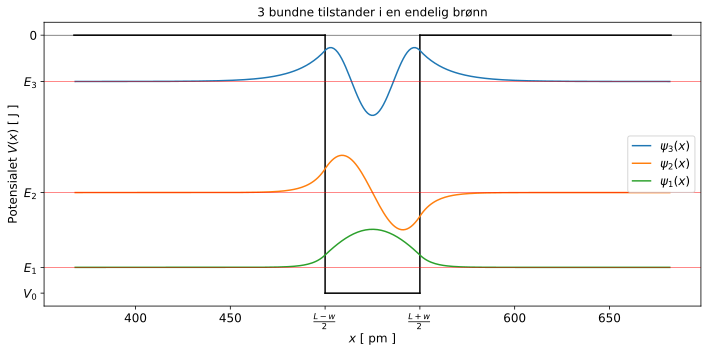

[-1.350e-16 -9.150e-17 -2.693e-17]
[-1.523e-17 -5.923e-17 -1.242e-16]


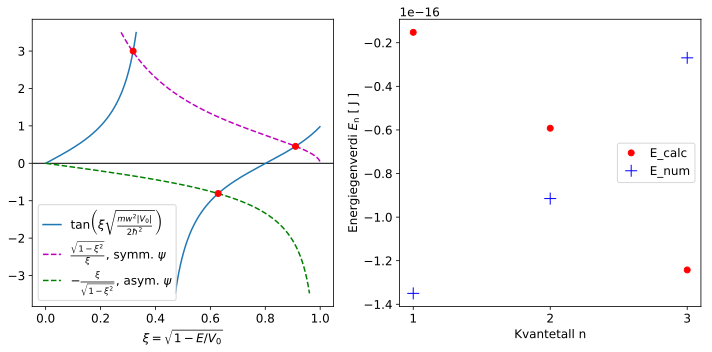

In [69]:
E, psi, x, L = eigenvalue_eigenvector(2) # Numerical solutions

plot3()
plot4()

## Oppgave 3

In [1]:
b = w/2 # bredde mellom atomer
L = 2*10*w + 2*w + b
deltaX = L/(N + 1)
x = np.linspace(0, L, N + 2)

q = hBar**2/(2 * m * deltaX**2)
d = 2 * q * np.ones(N)
e = -1 * q * np.ones(N-1)

d[int(np.round(10*N/22.5)):int(np.round(11*N/22.5))] -= V0
d[int(np.round(11.5*N/22.5)):int(np.round(12.5*N/22.5))] -= V0

NameError: name 'w' is not defined

In [2]:
# Bruker scipy sin eigh_tridiagonal for å hente ut egenverdiene E, og egenvektorene psi
E, psi = eigh_tridiagonal(d, e)
# Normerer psi
normalize_vectors(psi, deltaX)
print(E[:7])

plt.subplot(2, 1, 1)
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi (x)$ [$\mathrm{m}^{-1/2}$]")
#plt.plot(x[1:-1], psi[:,0]**2, label="$\psi_1(x)$")
#plt.plot(x[1:-1], psi[:,1]**2, label="$\psi_2(x)$")
#plt.plot(x[1:-1], psi[:,2], label="$\psi_3(x)$")
#plt.plot(x[1:-1], psi[:,3], label="$\psi_4(x)$")
plt.plot(x[1:-1], psi[:,4], label="$\psi_5(x)$")
plt.plot(x[1:-1], psi[:,5], label="$\psi_6(x)$")
#plt.plot(x[1:-1], psi[:,6], label="$\psi_7(x)$")
plt.axhline(0, linewidth=0.5, color='black')
plt.axvline(L*10/22.5, linewidth=1, color='black')
plt.axvline(L*11/22.5, linewidth=1, color='black')
plt.axvline(L*11.5/22.5, linewidth=1, color='black')
plt.axvline(L*12.5/22.5, linewidth=1, color='black')
plt.legend(loc='best')

x_axis = 1 + np.arange(10)
plt.subplot(2, 1, 2)
plt.title("10 første energiegenverdiene både numerisk og analytisk")
plt.xlabel("$n$")
plt.ylabel("$E_\mathrm{n}$ [ J ]")
plt.plot(x_axis, E[:x_axis.shape[0]], 'r.', label="Numerisk $E$")
plt.axhline(0, linewidth=0.5, color='black')
plt.legend(loc='best')

plt.show()

NameError: name 'eigh_tridiagonal' is not defined

## Oppgave 4

In [ ]:

d[int(np.round(10*N/22.5)):int(np.round(11*N/22.5))] -= V0

def update_diagonal(diag, width, num_wells, barr_w, length):
    n = d.size
    delta = L / N
    if Nw % 2 and Nw > 0:
        d[int(np.round((L-w)/2)):int(np.round((L+w)/2))] -= V0
        for i in range(Nw//2):
            d[int(np.round((L+w)/2 + (i+1)*(w+b))):int(np.round((L+w)/2 + w+(i+1)*(w+b)))] -= V0
            d[int(np.round((L-w)/2 - (i+1)*(w+b))):int(np.round((L-w)/2 - w-(i+1)*(w+b)))] -= V0
    elif Nw > 0:
        for i in range(Nw//2):
            d[int(np.round(((L+b)/2 + i*(w+b))/delta)):int(np.round(((L+b)/2 + w + i*(w+b))/delta))] -= V0
            d[int(np.round(((L-b)/2 - i*(w+b))/delta)):int(np.round(((L-b)/2 - w - i*(w+b))/delta))] -= V0

In [ ]:
Nw = 6
L = (2*10 + Nw)*w + (Nw-1)*b
deltaX = L/(N + 1)
x = np.linspace(0, L, N + 2)

q = hBar**2/(2 * m * deltaX**2)
d = 2 * q * np.ones(N)
e = -1 * q * np.ones(N-1)
update_diagonal(d, Nw, L, w, b, V0)

In [ ]:
# Bruker scipy sin eigh_tridiagonal for å hente ut egenverdiene E, og egenvektorene psi
E, psi = eigh_tridiagonal(d, e)
# Normerer psi
normalize_vectors(psi, deltaX)
print(E[:7])

plt.subplot(2, 1, 1)
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi (x)$ [$\mathrm{m}^{-1/2}$]")
plt.plot(x[1:-1], psi[:,0], label="$\psi_1(x)$")
plt.plot(x[1:-1], psi[:,1], label="$\psi_2(x)$")
#plt.plot(x[1:-1], psi[:,2], label="$\psi_3(x)$")
#plt.plot(x[1:-1], psi[:,3], label="$\psi_4(x)$")
#plt.plot(x[1:-1], psi[:,4], label="$\psi_5(x)$")
#plt.plot(x[1:-1], psi[:,5], label="$\psi_6(x)$")
#plt.plot(x[1:-4], psi[:,6]**2, label="$\psi_7(x)$")
plt.axhline(0, linewidth=0.5, color='black')
#plt.axvline(L*10/22.5, linewidth=1, color='black')
#plt.axvline(L*11/22.5, linewidth=1, color='black')
#plt.axvline(L*11.5/22.5, linewidth=1, color='black')
#plt.axvline(L*12.5/22.5, linewidth=1, color='black')
plt.legend(loc='best')

x_axis = 1 + np.arange(10)
plt.subplot(2, 1, 2)
plt.title("10 første energiegenverdiene både numerisk og analytisk")
plt.xlabel("$n$")
plt.ylabel("$E_\mathrm{n}$ [ J ]")
plt.plot(x_axis, E[:x_axis.shape[0]], 'r.', label="Numerisk $E$")
plt.axhline(0, linewidth=0.5, color='black')
plt.legend(loc='best')

plt.show()